In [56]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def MinMaxScaler(data):
    numerator = data - np.min(data, axis=0)
    denominator = np.max(data, axis=0) - np.min(data, axis=0)
    return numerator / (denominator + 1e-7)

In [4]:
xy = np.loadtxt('data/data-02-stock_daily.csv', delimiter=',') # 주식 데이터
xy

array([[8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       ...,
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02]])

In [6]:
xy = xy[::-1] # 순환망은 순서가 의미를 가지는 데이터셋이다. # -1로 순서를 뒤집어줌.
xy

array([[5.68002570e+02, 5.68002570e+02, 5.52922516e+02, 1.31000000e+04,
        5.58462551e+02],
       [5.61202549e+02, 5.66432590e+02, 5.58672539e+02, 4.12000000e+04,
        5.59992565e+02],
       [5.66892592e+02, 5.67002574e+02, 5.56932537e+02, 1.08000000e+04,
        5.56972503e+02],
       ...,
       [8.19929993e+02, 8.24400024e+02, 8.18979980e+02, 1.28170000e+06,
        8.24159973e+02],
       [8.23020020e+02, 8.28070007e+02, 8.21655029e+02, 1.59780000e+06,
        8.28070007e+02],
       [8.28659973e+02, 8.33450012e+02, 8.28349976e+02, 1.24770000e+06,
        8.31659973e+02]])

In [23]:
total_size = int(len(xy))
total_size

732

In [75]:
# train Parameters
seq_length = 7
input_feature = 5

train_size = int(len(xy) * 0.7)
train_set = xy[0:train_size]
test_set = xy[train_size - seq_length:]

In [76]:
print(train_set.shape, test_set.shape)

(512, 5) (227, 5)


In [77]:
train_set = MinMaxScaler(train_set)
test_set = MinMaxScaler(test_set)

In [78]:
def build_dataset(time_series, seq_length):
    dataX = []
    dataY = []
    
    for i in range(0, len(time_series) - seq_length):
        x = time_series[i:i+seq_length, :]
        y = time_series[i+seq_length, [-1]]
        print(x, ' -> ', y)
        dataX.append(x)
        dataY.append(y)
        
    return np.array(dataX), np.array(dataY)

In [79]:
trainX, trainY = build_dataset(train_set, seq_length)
testX, testY = build_dataset(test_set, seq_length)
print(trainX.shape, trainY.shape)

[[2.53065030e-01 2.45070970e-01 2.33983036e-01 4.66075110e-04
  2.32039560e-01]
 [2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78314566e-01 1.98470380e-01 5.70171193e-01
  1.78104644e-01]]  ->  [0.16053716]
[[2.29604366e-01 2.39728936e-01 2.54567513e-01 2.98467330e-03
  2.37426028e-01]
 [2.49235510e-01 2.41668371e-01 2.48338489e-01 2.59926504e-04
  2.26793794e-01]
 [2.21013495e-01 2.46602231e-01 2.54710584e-01 0.00000000e+00
  2.62668239e-01]
 [3.63433786e-01 3.70389871e-01 2.67168847e-01 1.24764722e-02
  2.62105010e-01]
 [2.59447633e-01 3.10673724e-01 2.74113889e-01 4.56323384e-01
  2.71751265e-01]
 [2.76008150e-01 2.78

In [80]:
print(trainX.shape, trainY.shape)

(505, 7, 5) (505, 1)


In [81]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.LSTM(units=1, input_shape=(seq_length, input_feature)))
model.add(tf.keras.layers.Dense(units=1, activation='tanh'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1)                 28        
                                                                 
 dense_2 (Dense)             (None, 1)                 2         
                                                                 
Total params: 30
Trainable params: 30
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=0.01))
model.fit(trainX, trainY, epochs=100)

Epoch 1/100
16/16 [==============================] - 2s 2ms/step - loss: 0.1443
Epoch 2/100
16/16 [==============================] - 0s 2ms/step - loss: 0.0701
Epoch 3/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0448
Epoch 4/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0232
Epoch 5/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0138
Epoch 6/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0104
Epoch 7/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 8/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0071
Epoch 9/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0063
Epoch 10/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 11/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 12/100
16/16 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 13/100
16/16 [=================

In [83]:
test_predict = model.predict(testX)
print(testX.shape, test_predict.shape)

7/7 [==============================] - 0s 1ms/step
(220, 7, 5) (220, 1)


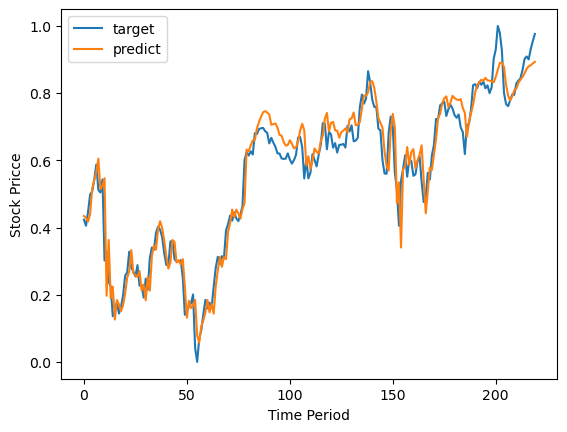

In [85]:
import os
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

plt.plot(testY)
plt.plot(test_predict)
plt.xlabel('Time Period')
plt.ylabel('Stock Pricce')
plt.legend(['target','predict'])
plt.show()